<a href="https://colab.research.google.com/github/KingAlogon/DeepLearningWithPython-worked-examples-/blob/main/LinearClassifierTF(3_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [6]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)*2
gradient = tape.gradient(result, input_const)
print(gradient)


tf.Tensor(12.0, shape=(), dtype=float32)


In [7]:
time = tf.Variable(0.0)
with tf.GradientTape() as tape:
  with tf.GradientTape() as tape2:
    position = 4.9*time**2
  velocity = tape2.gradient(position, time)
acceleration = tape.gradient(velocity, time)

print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


In [31]:
num_samples = 1000
negatives = np.random.multivariate_normal(
    mean=[0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples
)
positives = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [.5, 1]],
    size = num_samples
)


In [10]:
print(positives[:5])

[[ 3.10792633  1.04337342]
 [ 2.16898136  0.73561087]
 [ 4.03274424  0.35054635]
 [ 2.66068258 -1.20666338]
 [ 2.16485725 -1.53333426]]


In [12]:
inputs = np.vstack((positives, negatives)).astype(np.float32)

In [15]:
print(inputs[998:1003])

[[ 3.890519    0.20104842]
 [ 4.096301    2.789398  ]
 [ 1.4766436   4.2515154 ]
 [ 1.4900408   4.4745207 ]
 [-0.88436425  0.27865034]]


In [16]:
targets = np.vstack((np.zeros((num_samples, 1), dtype="float32"), np.ones((num_samples, 1), dtype="float32")))

In [17]:
print(targets[:5])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


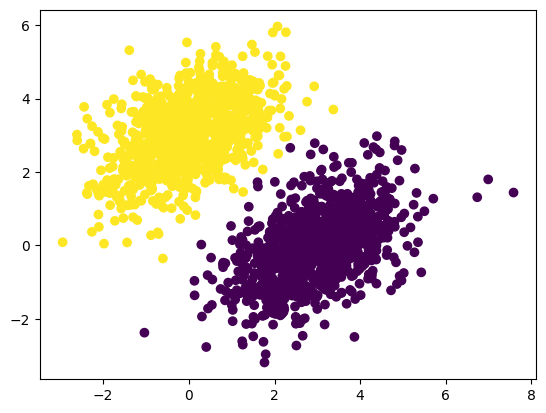

In [20]:
plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [21]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [22]:
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.88948333],
       [0.5271032 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [27]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [24]:
def square_loss(targets, predictions):
  tot_loss = tf.square(targets - predictions)
  return tf.reduce_mean(tot_loss)


In [34]:
learning_rate = .1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  dLdW, dLdb = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate*dLdW)
  b.assign_sub(learning_rate*dLdb)
  return loss

In [35]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")


Loss at step 0: 0.0542
Loss at step 1: 0.0517
Loss at step 2: 0.0494
Loss at step 3: 0.0473
Loss at step 4: 0.0454
Loss at step 5: 0.0436
Loss at step 6: 0.0420
Loss at step 7: 0.0405
Loss at step 8: 0.0392
Loss at step 9: 0.0380
Loss at step 10: 0.0368
Loss at step 11: 0.0358
Loss at step 12: 0.0348
Loss at step 13: 0.0340
Loss at step 14: 0.0332
Loss at step 15: 0.0324
Loss at step 16: 0.0318
Loss at step 17: 0.0311
Loss at step 18: 0.0306
Loss at step 19: 0.0301
Loss at step 20: 0.0296
Loss at step 21: 0.0292
Loss at step 22: 0.0288
Loss at step 23: 0.0284
Loss at step 24: 0.0281
Loss at step 25: 0.0278
Loss at step 26: 0.0275
Loss at step 27: 0.0272
Loss at step 28: 0.0270
Loss at step 29: 0.0268
Loss at step 30: 0.0266
Loss at step 31: 0.0264
Loss at step 32: 0.0262
Loss at step 33: 0.0261
Loss at step 34: 0.0260
Loss at step 35: 0.0258
Loss at step 36: 0.0257
Loss at step 37: 0.0256
Loss at step 38: 0.0255
Loss at step 39: 0.0254


<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.13079105],
       [ 0.16802725]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.4289373], dtype=float32)>


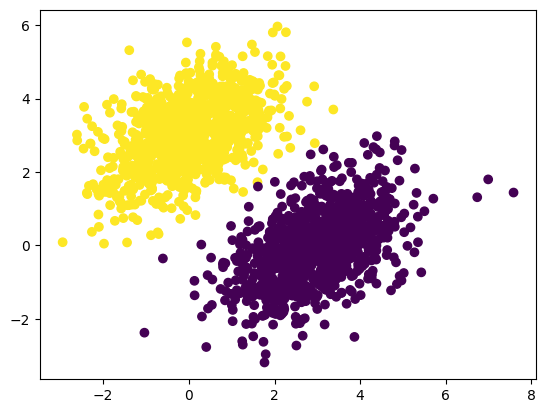

In [36]:
predictions = model(inputs)
print(W)
print(b)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0]> .5)

In [37]:
x = np.linspace(-1, 4, 100)
y = (-W[0]/W[1])*x + (.5-b)/W[1]

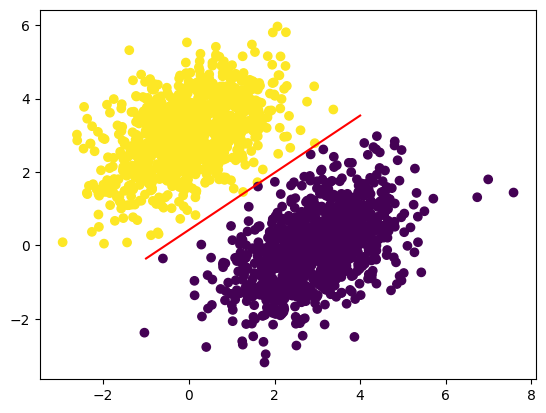

In [38]:
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > .5)